In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# Load your data
data = pd.read_csv('traffic_data.csv', parse_dates=['Date'], index_col='Date')

In [8]:
# Check the data
print(data.head())

            Accidents
Date                 
2020-01-01         10
2020-01-02          9
2020-01-03         11
2020-01-04         13
2020-01-05         10


In [9]:
#Extracts the 'Accidents' column as a NumPy array for further processing.
values = data['Accidents'].values


In [10]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(values.reshape(-1, 1))
print(values)

[[0.16666667]
 [0.13333333]
 [0.2       ]
 ...
 [0.86666667]
 [0.8       ]
 [0.83333333]]


In [11]:
# Prepare the data for time series forecasting by entering input(X) and output (Y) pairs
def create_dataset(dataset, look_back=7):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back])
        y.append(dataset[i + look_back])
    return np.array(X), np.array(y)


In [12]:
look_back = 7  # Use the past 7 days to predict the next day
X, y = create_dataset(values, look_back)
print(X)
print(y)

[[[0.16666667]
  [0.13333333]
  [0.2       ]
  ...
  [0.16666667]
  [0.16666667]
  [0.3       ]]

 [[0.13333333]
  [0.2       ]
  [0.26666667]
  ...
  [0.16666667]
  [0.3       ]
  [0.23333333]]

 [[0.2       ]
  [0.26666667]
  [0.16666667]
  ...
  [0.3       ]
  [0.23333333]
  [0.16666667]]

 ...

 [[0.8       ]
  [0.76666667]
  [0.76666667]
  ...
  [0.8       ]
  [0.83333333]
  [0.8       ]]

 [[0.76666667]
  [0.76666667]
  [0.76666667]
  ...
  [0.83333333]
  [0.8       ]
  [0.86666667]]

 [[0.76666667]
  [0.76666667]
  [0.8       ]
  ...
  [0.8       ]
  [0.86666667]
  [0.8       ]]]
[[0.23333333]
 [0.16666667]
 [0.23333333]
 ...
 [0.86666667]
 [0.8       ]
 [0.83333333]]


In [13]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    # X=independent variable,Y=dependent variable

In [14]:
# Reshape input to be [samples, time steps, features] into 3D formats
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [15]:
# Build the LSTM model
model = tf.keras.Sequential([                                             #Model initialization
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(look_back, 1)),  #add LSTM layer with 50 units
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1771 - val_loss: 0.0112
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0127 - val_loss: 0.0074
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072 - val_loss: 0.0048
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055 - val_loss: 0.0045
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0

In [17]:
# Predict future values
predictions = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [18]:
# Inverse the normalization
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)
print(predictions)
print(y_test_actual)

[[20.046185 ]
 [30.001463 ]
 [27.488623 ]
 [25.112654 ]
 [24.029118 ]
 [18.695112 ]
 [20.227161 ]
 [ 9.343653 ]
 [18.392347 ]
 [30.249857 ]
 [13.581882 ]
 [15.035284 ]
 [25.784735 ]
 [15.515591 ]
 [16.953209 ]
 [14.95203  ]
 [13.423111 ]
 [14.151911 ]
 [26.541454 ]
 [17.748512 ]
 [16.245247 ]
 [22.126537 ]
 [25.804893 ]
 [13.082653 ]
 [18.659021 ]
 [17.073746 ]
 [18.127092 ]
 [ 9.682595 ]
 [24.316263 ]
 [14.77269  ]
 [15.263942 ]
 [14.261303 ]
 [ 7.7394185]
 [18.483183 ]
 [30.252134 ]
 [21.64723  ]
 [25.726866 ]
 [28.395096 ]
 [26.159836 ]
 [25.656013 ]
 [21.958952 ]
 [19.29238  ]
 [11.448046 ]
 [30.373241 ]
 [20.839733 ]
 [21.547556 ]
 [12.279673 ]
 [16.8519   ]
 [11.167366 ]
 [ 7.985307 ]
 [15.748229 ]
 [25.531525 ]
 [20.630415 ]
 [14.884071 ]
 [23.373411 ]
 [26.621    ]
 [25.13144  ]
 [16.422075 ]
 [22.910938 ]
 [13.888594 ]
 [23.405138 ]
 [11.070399 ]
 [16.43969  ]
 [19.485825 ]
 [19.610226 ]
 [21.31528  ]
 [20.846176 ]
 [18.78557  ]
 [18.780285 ]
 [ 7.5688033]
 [16.281862 ]
 [27.3

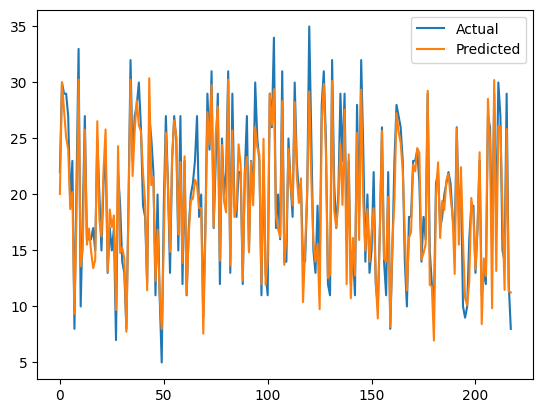

In [19]:
# Visualize the predictions
plt.plot(y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)

print(f"MSE: {mse}, MAE: {mae}")


MSE: 4.401374098137765, MAE: 1.6347605591520258


Recommended Action: Increase traffic control measures
Recommended Action: Prepare emergency response teams
Recommended Action: Increase road signage and awareness campaigns
Recommended Action: Increase traffic control measures
Recommended Action: Prepare emergency response teams
Recommended Action: Increase road signage and awareness campaigns
Recommended Action: Increase traffic control measures
Recommended Action: Prepare emergency response teams
Recommended Action: Increase road signage and awareness campaigns
Recommended Action: Increase traffic control measures
Recommended Action: Prepare emergency response teams
Recommended Action: Increase road signage and awareness campaigns
Recommended Action: Increase traffic control measures
Recommended Action: Prepare emergency response teams
Recommended Action: Increase road signage and awareness campaigns
Recommended Action: Increase traffic control measures
Recommended Action: Prepare emergency response teams
Recommended Action: Increase

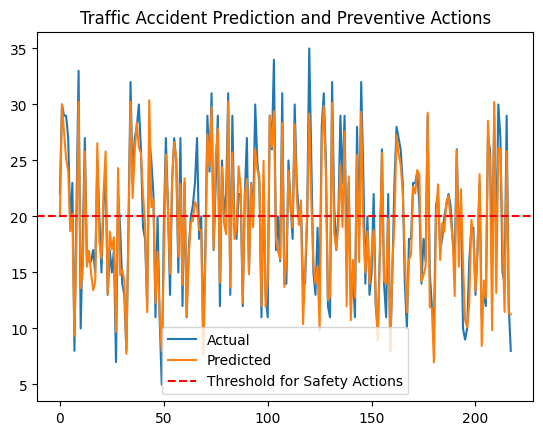

In [21]:
# Adding custom functions for prevention rules based on predictions
def suggest_safety_measures(predictions, threshold=20):
    """
    Suggests safety measures based on the predicted number of accidents.
    If the predicted accidents exceed a certain threshold, implement safety actions.
    """
    safety_actions = []
    for pred in predictions:
        if pred > threshold:
            safety_actions.append("Increase traffic control measures")
            safety_actions.append("Prepare emergency response teams")
            safety_actions.append("Increase road signage and awareness campaigns")
    return safety_actions

# Use predicted accident values to suggest preventive actions
actions = suggest_safety_measures(predictions.flatten())
for action in actions:
    print(f"Recommended Action: {action}")

# Visualization of predicted accident levels with safety measures
plt.plot(y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted')
# Add a warning line where the threshold for intervention is reached
plt.axhline(y=20, color='r', linestyle='--', label='Threshold for Safety Actions')
plt.legend()
plt.title("Traffic Accident Prediction and Preventive Actions")
plt.show()
